## **Image Augmentation**

**Link Dataset :**
3 class (Maurice Lacroix, Omega dan Rolex)
https://www.kaggle.com/datasets/ahedjneed/fancy-watche-images

### **Import Library**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

### **Proses Augmentasi Gambar**

In [2]:
img_path = "watches images"

img_datagen = ImageDataGenerator(
    rotation_range=0.5,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
img_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150),
    batch_size=100,

    class_mode="categorical",
    save_to_dir="augmentation",
    save_prefix="aug",
    save_format="jpg"
)

Found 600 images belonging to 3 classes.


### **Modelling**

**Train, Val & Test**

In [4]:
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

Train_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150),
    batch_size=100,
    subset='training',
    class_mode='categorical'
)

val_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150),
    batch_size=100,
    subset='validation',
    class_mode='categorical'
)

test_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical',
)

Found 420 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Found 600 images belonging to 3 classes.


### **Membuat Arsitektur**

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=[150,150,3]), # Input Layer
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

### **Fungsi Callback**

yang mana jika mencapai accuracy > 0.65 dan val accuracy > 0.65 epoch akan berhenti

In [6]:
class stopTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.65 and logs.get('val_accuracy') > 0.65):
            self.model.stop_training = True

In [7]:
model.compile(
    optimizer="Adam",
    loss = "categorical_crossentropy",
    metrics="accuracy"
)

In [8]:
myCallback = stopTraining()

In [9]:
history = model.fit(
    Train_generator,
    validation_data=val_generator,
    epochs = 50,
    callbacks = myCallback
)

Epoch 1/50
5/5 [==============================] - 388s 73s/step - loss: 1.1489 - accuracy: 0.3262 - val_loss: 1.0960 - val_accuracy: 0.3389
Epoch 2/50
5/5 [==============================] - 280s 51s/step - loss: 1.0977 - accuracy: 0.2976 - val_loss: 1.0911 - val_accuracy: 0.3444
Epoch 3/50
5/5 [==============================] - 220s 54s/step - loss: 1.1015 - accuracy: 0.3429 - val_loss: 1.0908 - val_accuracy: 0.5889
Epoch 4/50
5/5 [==============================] - 183s 35s/step - loss: 1.0958 - accuracy: 0.4429 - val_loss: 1.0819 - val_accuracy: 0.3389
Epoch 5/50
5/5 [==============================] - 184s 35s/step - loss: 1.0676 - accuracy: 0.4357 - val_loss: 1.0362 - val_accuracy: 0.5667
Epoch 6/50
5/5 [==============================] - 192s 37s/step - loss: 1.0281 - accuracy: 0.4286 - val_loss: 0.9643 - val_accuracy: 0.5611
Epoch 7/50
5/5 [==============================] - 198s 49s/step - loss: 0.9666 - accuracy: 0.4548 - val_loss: 0.9461 - val_accuracy: 0.5444
Epoch 8/50
5/5 [====

In [10]:
model.evaluate(val_generator)

2/2 [==============================] - 8s 3s/step - loss: 0.8426 - accuracy: 0.6611


[0.8426050543785095, 0.6611111164093018]

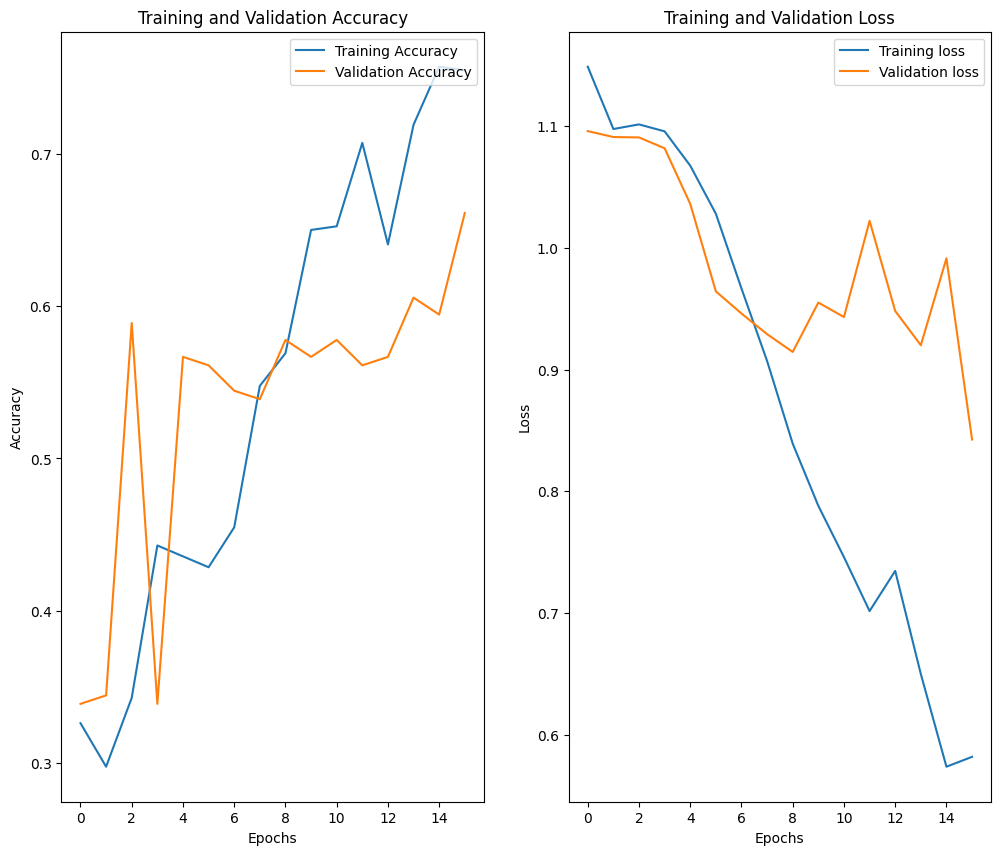

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()